In [1]:
import umap
import pandas as pd
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

#293 patients
rna = pd.read_csv("data/mRna_sorted_out.csv")
#576 patients
mrna = pd.read_csv("data/mrna_515.csv").T
#meth = pd.read_csv("data/methylation_sorted_out.csv")
#mirna = pd.read_csv("data/mirna_sorted_out.csv")
cancer_genes = pd.read_csv("data/cancer_genes.csv", header = None)

In [2]:
new_header = mrna.iloc[0] #grab the first row for the header
df = mrna[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
mrna = df

In [3]:
class dimr:
    def __init__(self, data, genes):
        self.data = data
        self.genes = genes
    
    def algo_umap(self, n_neigh, min_dis):
        #data = self.data.drop(['Gene'], axis=1).T
        for i in range(100):
            data = self.data.T

            try:
                color_idx = pd.read_csv("color_idx.csv")
            except:
                color_idx = obj_train.process()
            
            umap_result = umap.UMAP(n_neighbors = n_neigh, min_dist = min_dis, metric = 'cosine').fit_transform(data)
            print("UMAP result shape", umap_result.shape)

            final_df = pd.DataFrame(umap_result, index=range(umap_result.shape[0]), columns=range(umap_result.shape[1]))
            final_df = pd.concat([final_df, color_idx], axis=1)
            final_df.columns = ['a', 'b', 'c']
            final_df.to_csv("plots_515/umap_5_0.1/umap_" + str(n_neigh)+ "_" + str(min_dis*100) + '_' +  str(i) + ".csv", index = None)
            #final_df.to_csv("plots_576/data/final_df_mrna_iter_" + str(i) + ".csv", index = None)
            #plt.clf()
            #plot = sns.scatterplot('a', 'b', data = final_df, legend = "full",alpha=0.1).set_title('umap-plot_' + str(n_neigh)+ "_" + str(min_dis))

            #plt.clf()
            #df = final_df.loc[final_df['c']>=2] 
            #df.to_csv("plots_515/umap/data_df/umap_" + str(n_neigh)+ "_" + str(min_dis*100) + ".csv", index = None)
            #plot = sns.scatterplot('a', 'b', data=df, hue = 'c', palette=['green','orange','brown','dodgerblue','red', 'magenta', 'cyan', 'black', 'blue', 'yellow']).set_title('umap-plot_' + str(n_neigh)+ "_" + str(min_dis))
            #plot.figure.savefig('plots_515/umap/umap_'+ str(n_neigh)+ "_" + str(min_dis) + '.png', format = 'png', dpi = 1200)
        
            #return df_subset
    
    def algo_tsne(self, perplex, met, iter):
        #data = self.data.drop(['Gene'], axis=1).T
        data = self.data.T

        try:
            color_idx = pd.read_csv("color_idx.csv")
        except:
            color_idx = obj_train.process()
    
        tsne = TSNE(n_components=2, verbose=1, perplexity=perplex, metric = met, n_iter=iter)
        tsne_result = tsne.fit_transform(data)

        final_df = pd.DataFrame(tsne_result, index=range(tsne_result.shape[0]), columns=range(tsne_result.shape[1]))
        final_df = pd.concat([final_df, color_idx], axis=1)
        final_df.columns = ['a', 'b', 'c']
        final_df.to_csv("plots_515/tsne_6_cosine/data_finaldf/tsne_" + str(perplex) + '___'+ met + ".csv", index = None)
        #final_df.to_csv("plots_515/tsne_6_cosine/data_finaldf/tsne_6_cosine_" + str(i)+ ".csv", index = None)
        plt.clf()
        #plot = sns.scatterplot('a', 'b', data = final_df, legend = "full",alpha=0.1).set_title('tsne-plot-dist_' + str(perplex) + '___' + met + '_')
        #plot.figure.savefig('plots_515/tsne/tsne_'+ str(perplex) + '___'+ met + '.svg', format = 'svg', dpi = 1200)

        #plt.clf()
        df = final_df.loc[final_df['c']>=2] 
        #df.to_csv("plots_515/tsne_6_cosine/data_df/tsne_6_cosine_" + str(i) + ".csv", index = None)
        df.to_csv("plots_515/tsne_6_cosine/data_df/tsne_6_cosine_" + str(perplex) + '___'+ met + ".csv", index = None)
        #plot = sns.scatterplot('a', 'b', data=df, hue = 'c', palette=['green','orange','brown','dodgerblue','red', 'magenta', 'cyan', 'black', 'blue', 'yellow']).set_title('test_' + str(perplex) + '___' + met + '_')
        #plot.figure.savefig('plots_515/tsne_6_cosine/tsne_'+ str(perplex) + '___'+ met + '.png', format = 'png', dpi = 1200)

    def process(self):
        patients = self.data.iloc[:][:]
        #patients = patients.drop(['Unnamed: 0'], axis=1)
        #print(self.d.head())

        genes = self.genes.iloc[:][0]
        latent_loc = []
        for i in genes:
            try:
                location = self.data.columns.get_loc(i)      #get gene location
                latent_loc.append(location)
            except:
                print(i, "Not Located")                 
                latent_loc.append("Not Located")
                continue
        gene_loc = pd.DataFrame(latent_loc)

        a = self.genes.iloc[:][2]
        a = a.to_numpy()
        gene_loc[1] = pd.Series(a, index=gene_loc.index)
        gene_loc.drop([gene_loc.index[40],gene_loc.index[43]], inplace = True)
        gene_loc.reset_index(inplace = True)
        gene_loc = gene_loc.drop(columns=['index'])

        color_idx = pd.DataFrame(index=range(0, 20172),columns=range(1))

        for j in range(0, 82):
            print("step", j, "of 83")
            for i in range(0, 20172):
                if i == gene_loc.iloc[j][0]:
                    color_idx.iloc[i] = gene_loc.iloc[j][1]
                    break
                else:
                    continue
        color_idx = color_idx.fillna(1)
        color_idx.to_csv("color_idx.csv", index = None)
        return color_idx

    def run_umap(self):
        obj_train.algo_umap(5, 0.1)

    def run_tsne(self):
        obj_train.algo_tsne(6,"cosine", 1000)         

In [4]:
obj_train = dimr(mrna, cancer_genes)
#obj_train.run_umap()

In [116]:
import os
import natsort
listdir = os.listdir('plots_515/tsne/data_finaldf')
color_idx = pd.read_csv("color_idx.csv")
listdir = natsort.natsorted(listdir)

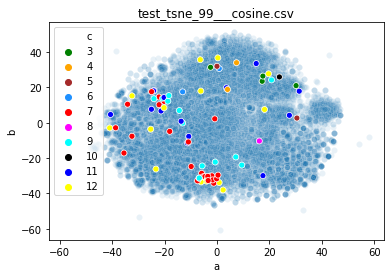

In [118]:
for doc in listdir:
    final_df = pd.read_csv('plots_515/tsne/data_finaldf/' + doc)
    final_df = final_df.drop('c', axis =1)
    final_df = pd.concat([final_df, color_idx], axis=1)
    final_df.columns = ['a', 'b', 'c']
    final_df.to_csv('plots_515/tsne/data_finaldf_2/' + doc)

    df = final_df.loc[final_df['c']>=2] 
    df.to_csv('plots_515/tsne/data_df/' + doc)

    plt.clf()
    plot = sns.scatterplot('a', 'b', data = final_df, legend = "full",alpha=0.1).set_title('tsne-plot-dist' + doc)
    #plot.figure.savefig('plots_515/tsne_6_cosine_100iter/pics/' + doc + '.png', format = 'png', dpi = 1200)
    plot = sns.scatterplot('a', 'b', data=df, hue = 'c', palette=['green','orange','brown','dodgerblue','red', 'magenta', 'cyan', 'black', 'blue', 'yellow']).set_title('test_' + doc)
    plot.figure.savefig('plots_515/tsne/pics/'+ doc+ '.png', format = 'png', dpi = 1200)

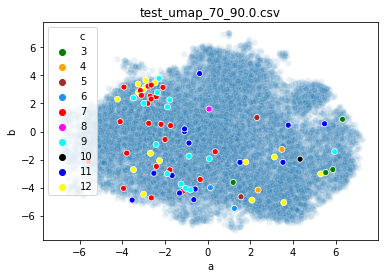

In [120]:
listdir = os.listdir('plots_515/umap/data_finaldf')
listdir = natsort.natsorted(listdir)
for doc in listdir:
    final_df = pd.read_csv('plots_515/umap/data_finaldf/' + doc)
    final_df = final_df.drop('c', axis =1)
    final_df = pd.concat([final_df, color_idx], axis=1)
    final_df.columns = ['a', 'b', 'c']
    final_df.to_csv('plots_515/umap/data_finaldf_2/' + doc)

    df = final_df.loc[final_df['c']>=2] 
    df.to_csv('plots_515/umap/data_df/' + doc)

    plt.clf()
    plot = sns.scatterplot('a', 'b', data = final_df, legend = "full",alpha=0.1).set_title('umap-plot-dist' + doc)
    #plot.figure.savefig('plots_515/tsne_6_cosine_100iter/pics/' + doc + '.png', format = 'png', dpi = 1200)
    plot = sns.scatterplot('a', 'b', data=df, hue = 'c', palette=['green','orange','brown','dodgerblue','red', 'magenta', 'cyan', 'black', 'blue', 'yellow']).set_title('test_' + doc)
    plot.figure.savefig('plots_515/umap/pics/'+ doc+ '.png', format = 'png', dpi = 1200)